In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"]=[20,10]

import warnings
warnings.filterwarnings("ignore")

# IMPORTING THE DATASET

In [2]:
station=pd.read_csv("station_day.csv")
station.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [5]:
loc = []

for i in station["StationId"]:
    loc.append(i[:2])

In [7]:
station["StationId"] = pd.Series(loc)

In [9]:
len(station.StationId.unique())

21

In [12]:
df = station.dropna()

In [14]:
df.groupby("StationId")["AQI"].describe()

,count,mean,std,min,25%,50%,75%,max
StationId,,,,,,,,
AP,1777.0,111.335959,56.769034,23.0,74.0,100.0,131.0,387.0
BR,257.0,167.420233,83.474468,39.0,120.0,149.0,196.0,634.0
CH,277.0,93.241877,55.116043,26.0,60.0,80.0,107.0,335.0
DL,1126.0,212.980462,122.330494,36.0,105.0,180.0,316.0,692.0
HR,111.0,152.873874,45.348773,64.0,122.5,153.0,175.0,328.0
PB,636.0,129.169811,78.934077,39.0,73.0,107.5,147.0,478.0
TG,5049.0,97.386215,37.267804,16.0,69.0,99.0,123.0,444.0
WB,1081.0,128.365402,87.545854,20.0,53.0,102.0,190.0,362.0


In [17]:
df.AQI_Bucket.unique()

# from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

labels = {'Moderate':3, 'Poor':4, 'Very Poor':5, 'Satisfactory':2, 'Good':1, 'Severe':6}

In [23]:
df.columns

Index(['StationId', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [24]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(encode = "ordinal", strategy = "uniform")

kbins.fit_transform(df.loc[:, ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 3., ..., 1., 1., 0.],
       [0., 1., 2., ..., 1., 1., 0.],
       [0., 1., 1., ..., 2., 1., 0.]])

# SHAPE OF THE DATA

In [3]:
station.shape

(108035, 16)

# INFO ABOUT THE DATA

In [4]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


# DECRIPTION OF THE DATA

* Five point summary will give the insights about the numerical values of the data

In [5]:
station.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


# GETTING THE NUMERICAL COLUMNS OF THE DATA 

In [6]:
num=station.select_dtypes(include=np.number).columns
num

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

# UNIVARIATE ANALYSIS

* univariate analysis is to get known about the spread of the data.

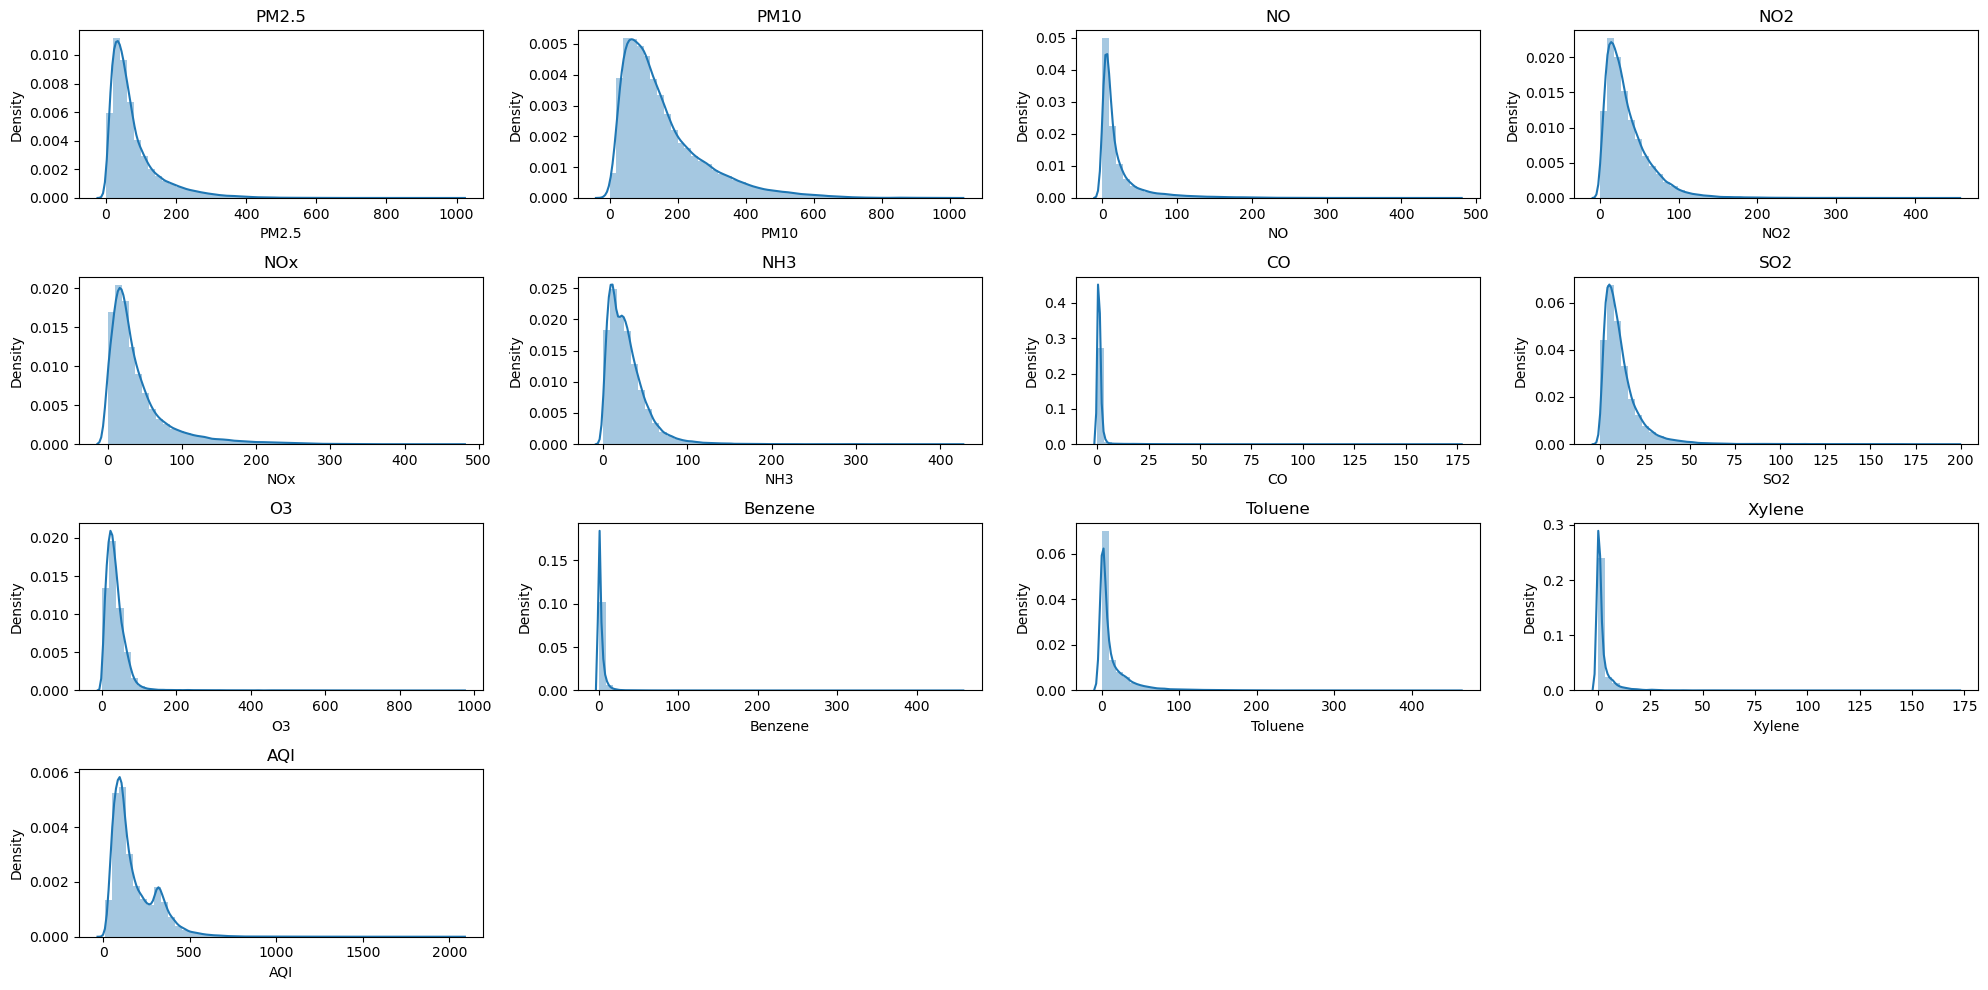

In [7]:
it=1
for i in num:
    plt.subplot(4,4,it)
    sns.distplot(station[i])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

* Here all the numerical columns are positively skewed. 

# BIVARIATE ANALYSIS

In [8]:
# GETTING THE LIST OF NUMERICAL COLUMNS EXCEPT THE TARGET VARIABLE "AQI".
num=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']

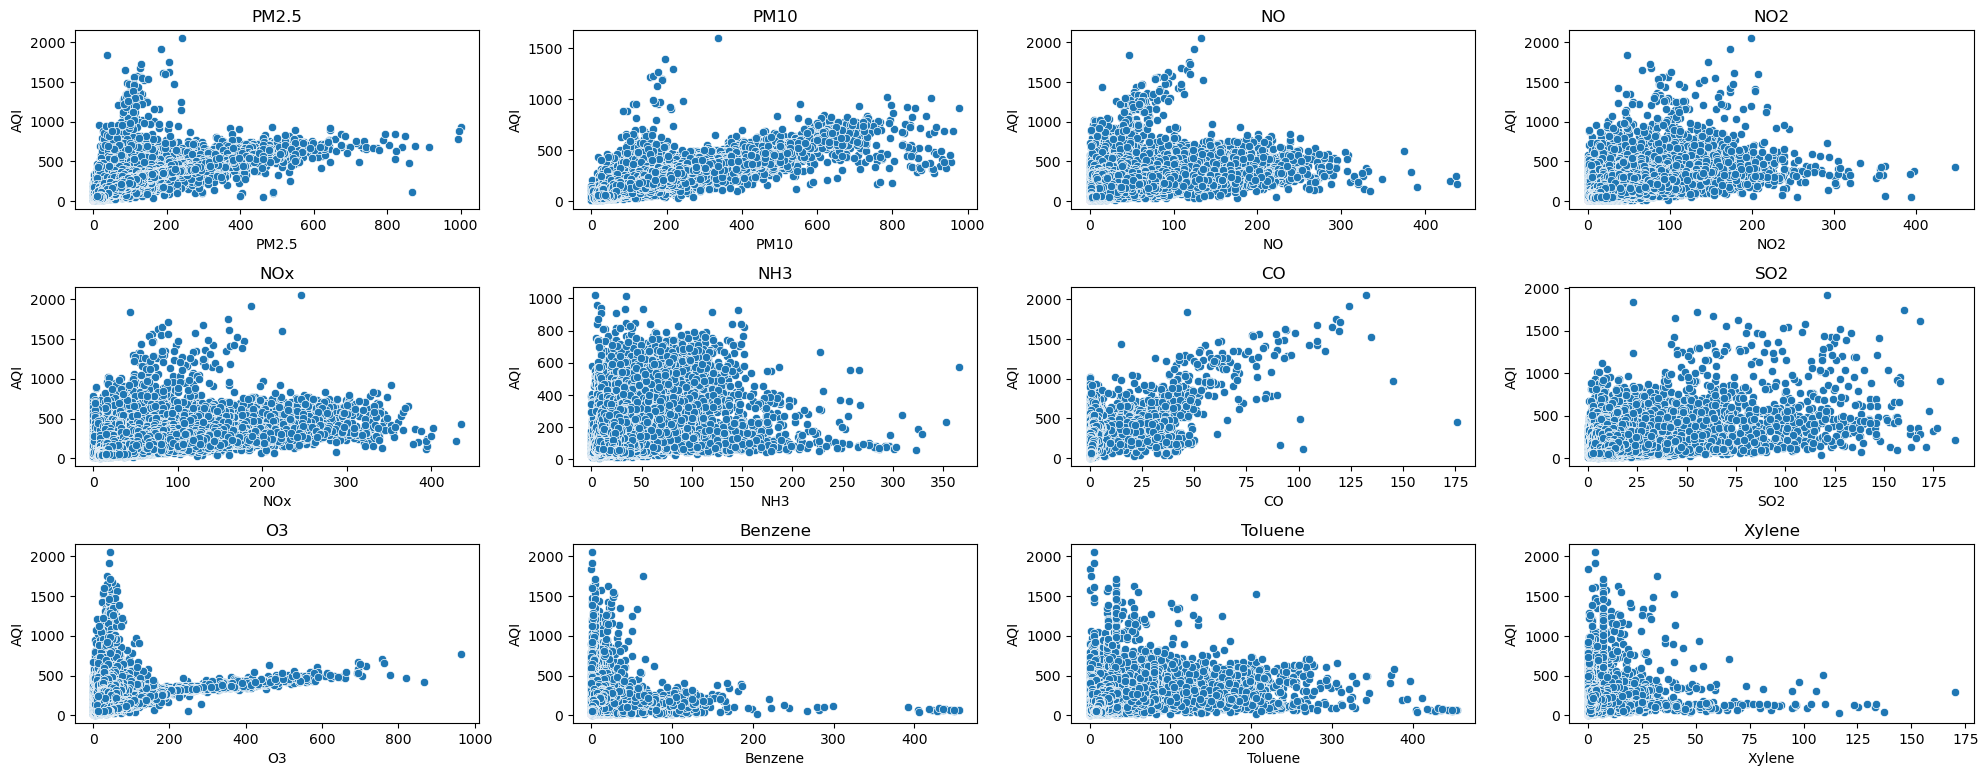

In [9]:
# analysis of each numerical variable with the target
it=1
for i in num:
    plt.subplot(4,4,it)
    sns.scatterplot(station[i],station["AQI"])
    plt.title(i)
    it+=1
plt.tight_layout()
plt.show()

* PM2.5,PM10,NO,NO2,NOx,NH3,SO2,O3,Benzene,Toluene,Xylene=>  no linear relationship with AQI
* CO=> has  linear relationship with AQI

# Finding null values

In [10]:
# getting in the percentage of null values in the data
station.isnull().sum()/len(station)*100

StationId      0.000000
Date           0.000000
PM2.5         20.016661
PM10          39.529782
NO            15.833758
NO2           15.316333
NOx           14.347202
NH3           44.527237
CO            12.031286
SO2           23.329477
O3            23.666404
Benzene       29.115564
Toluene       35.823576
Xylene        78.805017
AQI           19.447401
AQI_Bucket    19.447401
dtype: float64

<AxesSubplot:>

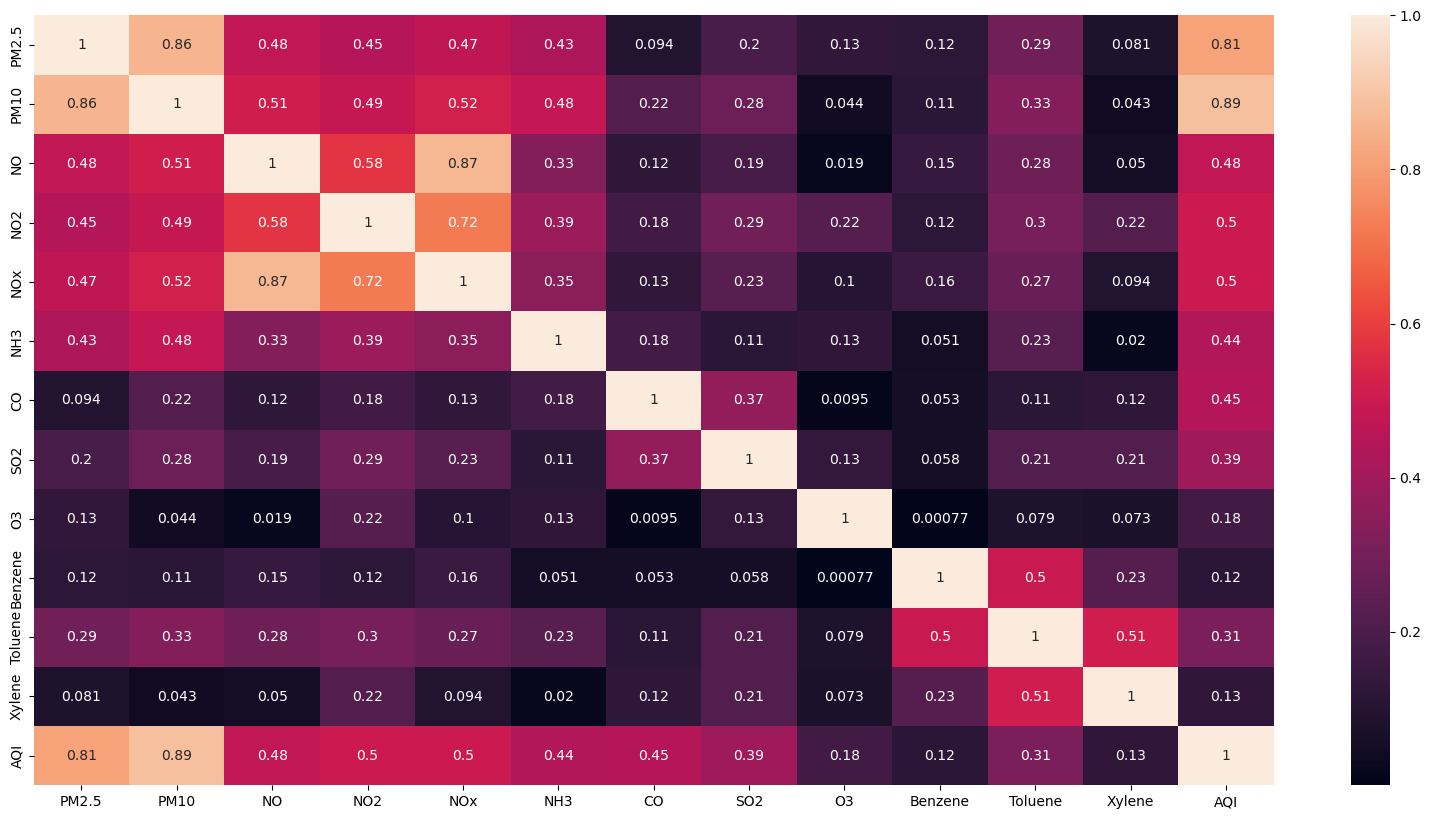

In [12]:
# correlation with target avriable 
sns.heatmap(station.corr(),annot=True)

* From the above heatmap we observe that PM10 has highest correlation(0.89) with the target variable. so we thought of dropping the null values in the PM10 to avoid  the extreme bias in the data.

### DROPPING THE NULL VALUES IN THE PM10

In [13]:
df=station[~station["PM10"].isnull()]

In [14]:
df.head(2)

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate


In [15]:
# SHAPE OF THE DATA AFTER DROPPING THE NULL VALUES IN PM10
df.shape

(65329, 16)

In [15]:
# SUMMARY
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,61525.000000,65329.000000,63365.000000,64040.000000,62544.000000,52483.000000,64228.000000,56406.000000,61580.000000,52399.000000,44571.000000,16370.000000,63064.000000
mean,78.401027,157.968427,25.623455,36.341587,47.265172,27.000531,1.227117,12.685038,39.713884,3.869929,19.783920,2.471266,176.978783
std,75.062062,123.418672,37.272666,29.752593,48.814466,21.503967,2.082188,11.687716,43.473739,12.417751,33.474189,6.472377,124.317688
min,0.040000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,10.000000
25%,30.850000,70.150000,4.780000,15.410000,16.340000,11.360000,0.560000,5.710000,19.010000,0.310000,1.570000,0.030000,89.000000
50%,54.840000,122.090000,11.320000,28.790000,31.290000,22.510000,0.900000,10.010000,31.270000,1.560000,7.450000,0.540000,133.000000
75%,96.900000,208.670000,28.510000,48.970000,58.700000,36.640000,1.440000,16.010000,48.720000,4.180000,24.010000,2.400000,244.000000
max,917.770000,1000.000000,436.800000,397.770000,453.610000,365.680000,119.300000,186.080000,963.000000,455.030000,454.850000,137.450000,1595.000000


In [16]:
# NULL VALUE PERCENTAGE
df.isnull().sum()/len(df)*100

StationId      0.000000
Date           0.000000
PM2.5          5.822835
PM10           0.000000
NO             3.006322
NO2            1.973090
NOx            4.263038
NH3           19.663549
CO             1.685316
SO2           13.658559
O3             5.738646
Benzene       19.792129
Toluene       31.774556
Xylene        74.942216
AQI            3.467067
AQI_Bucket     3.467067
dtype: float64

### DROPPING THE XYLENE COLUMN

* since Xylene has 73% of null values and has only 0.034 correlation with the target variable ,
* we tend to drop the column Xylene

In [17]:
df.drop("Xylene",axis=1,inplace=True)

# DATA IMPUTATION

* Null values in the Data is imputed using KNN-imputer.

* KNN-imputer =>
    KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median. In this approach, we specify a distance from the missing values which is also known as the K parameter. The missing value will be imputed in reference to the mean of the neighbours.

In [18]:
df["StationId"].unique()

array(['AP001', 'AP005', 'AS001', 'BR005', 'BR006', 'BR008', 'BR009',
       'BR010', 'CH001', 'DL001', 'DL002', 'DL003', 'DL004', 'DL005',
       'DL006', 'DL007', 'DL008', 'DL009', 'DL010', 'DL012', 'DL014',
       'DL015', 'DL016', 'DL017', 'DL018', 'DL019', 'DL020', 'DL022',
       'DL023', 'DL024', 'DL025', 'DL026', 'DL027', 'DL028', 'DL029',
       'DL030', 'DL031', 'DL032', 'DL034', 'DL035', 'DL036', 'DL037',
       'DL038', 'GJ001', 'HR011', 'HR012', 'HR013', 'JH001', 'KA004',
       'KA005', 'KA006', 'KA007', 'KA008', 'KA010', 'KA011', 'KL002',
       'KL004', 'KL007', 'KL008', 'MH005', 'MH006', 'MH007', 'MH008',
       'MH009', 'MH010', 'MH011', 'MH012', 'MH013', 'MH014', 'ML001',
       'MP001', 'MZ001', 'OD001', 'OD002', 'PB001', 'RJ004', 'RJ005',
       'RJ006', 'TG001', 'TG002', 'TG003', 'TG004', 'TG006', 'TN002',
       'TN005', 'WB007', 'WB008', 'WB009', 'WB010', 'WB011', 'WB012',
       'WB013'], dtype=object)

In [19]:
station_id=['AP001', 'AP005', 'AS001', 'BR005', 'BR006', 'BR008', 'BR009',
       'BR010', 'CH001', 'DL001', 'DL002', 'DL003', 'DL004', 'DL005',
       'DL006', 'DL007', 'DL008', 'DL009', 'DL010', 'DL012', 'DL014',
       'DL015', 'DL016', 'DL017', 'DL018', 'DL019', 'DL020', 'DL022',
       'DL023', 'DL024', 'DL025', 'DL026', 'DL027', 'DL028', 'DL029',
       'DL030', 'DL031', 'DL032', 'DL034', 'DL035', 'DL036', 'DL037',
       'DL038', 'GJ001', 'HR011', 'HR012', 'HR013', 'JH001', 'KA004',
       'KA005', 'KA006', 'KA007', 'KA008', 'KA010', 'KA011', 'KL002',
       'KL004', 'KL007', 'KL008', 'MH005', 'MH006', 'MH007', 'MH008',
       'MH009', 'MH010', 'MH011', 'MH012', 'MH013', 'MH014', 'ML001',
       'MP001', 'MZ001', 'OD001', 'OD002', 'PB001', 'RJ004', 'RJ005',
       'RJ006', 'TG001', 'TG002', 'TG003', 'TG004', 'TG006', 'TN002',
       'TN005', 'WB007', 'WB008', 'WB009', 'WB010', 'WB011', 'WB012',
       'WB013']

In [20]:
len(station_id)

92

In [21]:
col=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene']

#### Some of the stations have no records of the particullar pollutant so we impute the missing values with zero for better prediction.

In [22]:
# getting the pollutant names for the station where there are no records.
null_sid=[]
dic={}
for i in station_id:
    for j in col:
        if ( ~  (df[df["StationId"]==i][j].isnull().sum() <  len(df[df["StationId"]==i][j]))  ):
            null_sid.append({i:j})
null_sid        

[{'AS001': 'Toluene'},
 {'BR010': 'SO2'},
 {'DL004': 'NH3'},
 {'DL004': 'SO2'},
 {'DL004': 'Benzene'},
 {'DL004': 'Toluene'},
 {'DL006': 'NH3'},
 {'DL006': 'SO2'},
 {'DL006': 'Toluene'},
 {'DL007': 'NH3'},
 {'DL007': 'SO2'},
 {'DL012': 'NH3'},
 {'DL012': 'SO2'},
 {'DL012': 'Benzene'},
 {'DL012': 'Toluene'},
 {'DL014': 'Benzene'},
 {'DL014': 'Toluene'},
 {'DL017': 'NH3'},
 {'DL017': 'SO2'},
 {'DL025': 'NH3'},
 {'DL025': 'SO2'},
 {'DL030': 'NH3'},
 {'DL030': 'SO2'},
 {'DL035': 'Toluene'},
 {'GJ001': 'NH3'},
 {'HR011': 'NH3'},
 {'HR011': 'SO2'},
 {'HR011': 'Benzene'},
 {'HR011': 'Toluene'},
 {'HR013': 'NH3'},
 {'JH001': 'NOx'},
 {'JH001': 'Benzene'},
 {'JH001': 'Toluene'},
 {'KA005': 'PM2.5'},
 {'KA005': 'NH3'},
 {'KA005': 'O3'},
 {'KA005': 'Benzene'},
 {'KA005': 'Toluene'},
 {'KA006': 'NO'},
 {'KA006': 'NOx'},
 {'KA006': 'Toluene'},
 {'KA010': 'PM2.5'},
 {'KA010': 'NH3'},
 {'KA010': 'O3'},
 {'KA010': 'Benzene'},
 {'KA010': 'Toluene'},
 {'KL002': 'O3'},
 {'KL004': 'Benzene'},
 {'KL007': '

In [23]:
len(null_sid)

65

In [24]:
# getting the pollutant names for the station where there are less than 5 records to find out the neighours for the pollutant.

null_sid1=[]
#dic={}
for i in station_id:
    for j in col:
        if ( ~ (df[df["StationId"]==i][j].notnull().sum()>=5)  ):
            null_sid1.append({i:j})
null_sid1 

[{'AS001': 'Toluene'},
 {'BR010': 'SO2'},
 {'DL004': 'NH3'},
 {'DL004': 'SO2'},
 {'DL004': 'Benzene'},
 {'DL004': 'Toluene'},
 {'DL006': 'NH3'},
 {'DL006': 'SO2'},
 {'DL006': 'Benzene'},
 {'DL006': 'Toluene'},
 {'DL007': 'NH3'},
 {'DL007': 'SO2'},
 {'DL012': 'NH3'},
 {'DL012': 'SO2'},
 {'DL012': 'Benzene'},
 {'DL012': 'Toluene'},
 {'DL014': 'Benzene'},
 {'DL014': 'Toluene'},
 {'DL017': 'NH3'},
 {'DL017': 'SO2'},
 {'DL025': 'NH3'},
 {'DL025': 'SO2'},
 {'DL030': 'NH3'},
 {'DL030': 'SO2'},
 {'DL035': 'Toluene'},
 {'GJ001': 'NH3'},
 {'HR011': 'NH3'},
 {'HR011': 'SO2'},
 {'HR011': 'Benzene'},
 {'HR011': 'Toluene'},
 {'HR013': 'NH3'},
 {'JH001': 'NOx'},
 {'JH001': 'Benzene'},
 {'JH001': 'Toluene'},
 {'KA005': 'PM2.5'},
 {'KA005': 'NH3'},
 {'KA005': 'O3'},
 {'KA005': 'Benzene'},
 {'KA005': 'Toluene'},
 {'KA006': 'NO'},
 {'KA006': 'NOx'},
 {'KA006': 'Toluene'},
 {'KA010': 'PM2.5'},
 {'KA010': 'NH3'},
 {'KA010': 'O3'},
 {'KA010': 'Benzene'},
 {'KA010': 'Toluene'},
 {'KL002': 'O3'},
 {'KL004': '

In [25]:
len(null_sid1)

67

In [26]:
# getting the name of the pollutant have less than 5 non-null values. 
for i in null_sid1:
    if i in null_sid:
        continue
    else:
        print(i)
        null_sid.append(i)

{'DL006': 'Benzene'}
{'MH005': 'Toluene'}


In [27]:
# imputing the missing values with zero where there is no records of the pollutant in particular station.
for i in station_id:
    for j in col:
        if ( ~  (df[df["StationId"]==i][j].isnull().sum() <  len(df[df["StationId"]==i][j]))  ):
            df.loc[((df.StationId == i)  & (df[j].isnull())) , j] = 0

In [28]:
for i in null_sid:
    for j in col:
        print(df[df["StationId"]==i][j].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [29]:
# for Benezene feature in DL006 station we have two records, so we impute that  with mean of the two values. 
df.loc[((df.StationId == "DL006")  & (df["Benzene"].isnull())) , "Benzene"] = 1.1

In [30]:
df[ df["StationId"]== "DL006" ]["Benzene"].isnull().sum()

0

In [31]:
# for toluene in MH005 we had only on record, so we impute that with zero.
df.loc[((df.StationId == "MH005")  & (df["Toluene"].isnull())) , "Toluene"] = 0

In [32]:
df[ df["StationId"]== "MH005" ]["Toluene"].isnull().sum()

0

In [33]:
col=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene']

In [34]:
# KNNImputer for the rest of the null values.

from sklearn.impute import KNNImputer
for k in col:
    l=[]
    for i in station_id:
        
        imputer = KNNImputer(n_neighbors=5)
        temp=df[df["StationId"]==i]
        temp_df=pd.DataFrame(imputer.fit_transform(temp[[k]]))
        for j in temp_df[0]:
            l.append(j)
    df[k]=l

In [35]:
df.isnull().sum()

StationId        0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI           2265
AQI_Bucket    2265
dtype: int64

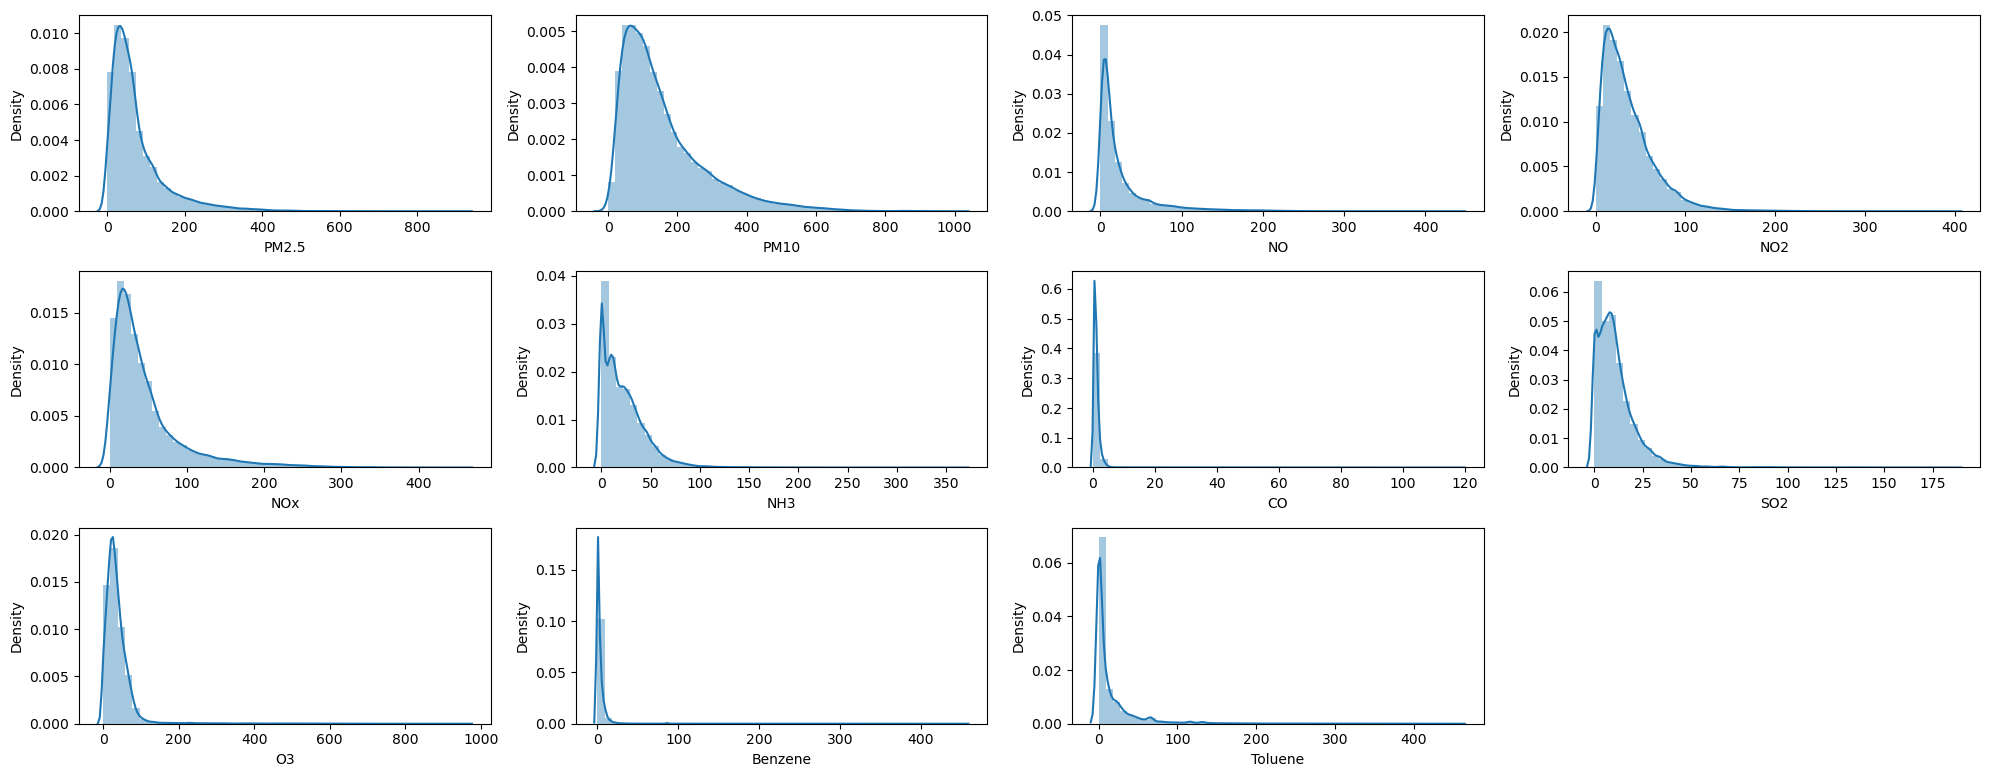

In [36]:
# distribution of the data after imputation.
it=1
for i in col:
    plt.subplot(4,4,it)
    sns.distplot(df[i])
    it+=1
plt.tight_layout()
plt.show()

In [37]:
# filling the null values in the target variable with backward fill to keep the AQI score for 
# the particluar station within the range 

df["AQI"].fillna(method="bfill",inplace=True)

In [38]:
df["AQI"].isnull().sum()

0

In [39]:
# imputing the null value in AQI_Bucket using backward fill. 
df["AQI_Bucket"].fillna(method="bfill",inplace=True)

In [40]:
df["AQI_Bucket"].isnull().sum()

0

In [41]:
# checking null values after imputation.
df.isnull().sum()

StationId     0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

In [42]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,184.0,Moderate
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,188.0,Moderate


In [43]:
# reseting the index
df.reset_index(inplace=True)

In [44]:
df.drop("index",1,inplace=True)

In [45]:
df.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,184.0,Moderate
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,188.0,Moderate


# Scaling the data

In [46]:
# scaling the data to give equal weightage for all features using StandardScalar.

In [47]:
df_sc=df.copy()

In [48]:
col=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene',"AQI"]

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()

In [51]:
for i in col:
    df_sc[i]=sc.fit_transform(df_sc[[i]])

In [52]:
df_sc.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,AP001,2017-11-24,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,Moderate
1,AP001,2017-11-25,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,Moderate
2,AP001,2017-11-26,0.039762,-0.234232,-0.656513,-0.349981,-0.647001,-0.549051,-0.526335,1.342489,1.849269,-0.276739,-0.253268,0.160715,Moderate
3,AP001,2017-11-27,0.179942,-0.183510,-0.511923,-0.186055,-0.504016,-0.428970,-0.540861,1.908674,1.718345,-0.270834,-0.263626,0.168757,Moderate
4,AP001,2017-11-28,-0.150099,-0.436553,-0.621313,-0.280017,-0.602370,-0.497001,-0.550544,0.662725,2.331573,-0.280957,-0.348111,0.088340,Moderate


In [53]:
# converting the datatype of the date column to datetime and extracting the year and month for future analysis. 
df_sc["Date"]=pd.to_datetime(df_sc["Date"])

In [54]:
df_sc["Year"]=df_sc["Date"].dt.year

In [55]:
df_sc.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year
0,AP001,2017-11-24,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,Moderate,2017
1,AP001,2017-11-25,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,Moderate,2017
2,AP001,2017-11-26,0.039762,-0.234232,-0.656513,-0.349981,-0.647001,-0.549051,-0.526335,1.342489,1.849269,-0.276739,-0.253268,0.160715,Moderate,2017
3,AP001,2017-11-27,0.179942,-0.183510,-0.511923,-0.186055,-0.504016,-0.428970,-0.540861,1.908674,1.718345,-0.270834,-0.263626,0.168757,Moderate,2017
4,AP001,2017-11-28,-0.150099,-0.436553,-0.621313,-0.280017,-0.602370,-0.497001,-0.550544,0.662725,2.331573,-0.280957,-0.348111,0.088340,Moderate,2017


In [56]:
df_sc["Month"]=df_sc["Date"].dt.month
df_sc.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
0,AP001,2017-11-24,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,Moderate,2017,11
1,AP001,2017-11-25,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,Moderate,2017,11
2,AP001,2017-11-26,0.039762,-0.234232,-0.656513,-0.349981,-0.647001,-0.549051,-0.526335,1.342489,1.849269,-0.276739,-0.253268,0.160715,Moderate,2017,11
3,AP001,2017-11-27,0.179942,-0.183510,-0.511923,-0.186055,-0.504016,-0.428970,-0.540861,1.908674,1.718345,-0.270834,-0.263626,0.168757,Moderate,2017,11
4,AP001,2017-11-28,-0.150099,-0.436553,-0.621313,-0.280017,-0.602370,-0.497001,-0.550544,0.662725,2.331573,-0.280957,-0.348111,0.088340,Moderate,2017,11


In [57]:
df_sc.drop("Date",1,inplace=True)

In [58]:
df_sc.head(2)

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month
0,AP001,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,Moderate,2017,11
1,AP001,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,Moderate,2017,11


# Encoding the categorical variables

* encoding the categorical variable with ordinal encoding to maintain the heirarchy of the data. 

In [59]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[["Severe","Very Poor","Poor","Moderate","Satisfactory","Good"]])
df_sc["AQI_Bucket_enc"]=enc.fit_transform(df[["AQI_Bucket"]])
df_sc.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month,AQI_Bucket_enc
0,AP001,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,Moderate,2017,11,3.0
1,AP001,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,Moderate,2017,11,3.0
2,AP001,0.039762,-0.234232,-0.656513,-0.349981,-0.647001,-0.549051,-0.526335,1.342489,1.849269,-0.276739,-0.253268,0.160715,Moderate,2017,11,3.0
3,AP001,0.179942,-0.183510,-0.511923,-0.186055,-0.504016,-0.428970,-0.540861,1.908674,1.718345,-0.270834,-0.263626,0.168757,Moderate,2017,11,3.0
4,AP001,-0.150099,-0.436553,-0.621313,-0.280017,-0.602370,-0.497001,-0.550544,0.662725,2.331573,-0.280957,-0.348111,0.088340,Moderate,2017,11,3.0


In [60]:
df_sc.drop("AQI_Bucket",1,inplace=True)

In [61]:
df_sc.head(2)

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,AQI_Bucket_enc
0,AP001,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,2017,11,3.0
1,AP001,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,2017,11,3.0


In [62]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[[2015,2016,2017,2018,2019,2020]])
df_sc["Year_enc"]=enc.fit_transform(df_sc[["Year"]])
df_sc.head(2)

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,AQI_Bucket_enc,Year_enc
0,AP001,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,2017,11,3.0,2.0
1,AP001,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,2017,11,3.0,2.0


In [63]:
df_sc.drop("Year",1,inplace=True)

In [64]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[[1,2,3,4,5,6,7,8,9,10,11,12]])
df_sc["Month_enc"]=enc.fit_transform(df_sc[["Month"]])
df_sc.head(2)

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Month,AQI_Bucket_enc,Year_enc,Month_enc
0,AP001,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,11,3.0,2.0,10.0
1,AP001,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,11,3.0,2.0,10.0


In [65]:
df_sc.drop("Month",1,inplace=True)

In [66]:
df_sc.head(2)

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket_enc,Year_enc,Month_enc
0,AP001,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,3.0,2.0,10.0
1,AP001,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,3.0,2.0,10.0


# Dropping station id Feature

In [67]:
df_sc.drop("StationId",1,inplace=True)

In [68]:
df_sc.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket_enc,Year_enc,Month_enc
0,-0.053692,-0.342077,-0.643246,-0.530806,-0.697625,-0.461844,-0.545702,-0.040950,1.659046,-0.280957,-0.318978,0.056173,3.0,2.0,10.0
1,0.081118,-0.271180,-0.651640,-0.535876,-0.704237,-0.528961,-0.536019,0.341631,2.073678,-0.278426,-0.300204,0.056173,3.0,2.0,10.0
2,0.039762,-0.234232,-0.656513,-0.349981,-0.647001,-0.549051,-0.526335,1.342489,1.849269,-0.276739,-0.253268,0.160715,3.0,2.0,10.0
3,0.179942,-0.183510,-0.511923,-0.186055,-0.504016,-0.428970,-0.540861,1.908674,1.718345,-0.270834,-0.263626,0.168757,3.0,2.0,10.0
4,-0.150099,-0.436553,-0.621313,-0.280017,-0.602370,-0.497001,-0.550544,0.662725,2.331573,-0.280957,-0.348111,0.088340,3.0,2.0,10.0


# Base model building

### Splitting the data into train and test.

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x=df_sc.drop(columns=["AQI","AQI_Bucket_enc"],axis=1)
y=df_sc["AQI"]

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=10)

In [72]:
xtrain.shape , xtest.shape,ytrain.shape,ytest.shape

((52263, 13), (13066, 13), (52263,), (13066,))

### Building a Stats model for the data.

In [73]:
import statsmodels.api as sma

In [74]:
temp_xtrain=sma.add_constant(xtrain)
temp_xtest=sma.add_constant(xtest)

model=sma.OLS(ytrain,temp_xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 2.637e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:28:27   Log-Likelihood:                -21428.
No. Observations:               52263   AIC:                         4.288e+04
Df Residuals:                   52249   BIC:                         4.301e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1581      0.007     21.394      0.000       0.144       0.173
PM2.5          0.3408      0.003    105.992      0.000       0.335       0.347
PM10           0.5098      0.003    157.397      0.000       0.503       0.516
NO            -0.0078      0.003     -2.418      0.016      -0.014      -0.001
NO2            0.0021      0.003      0.849      0.396      -0.003       0.007
NOx            0.0351      0.004      9.363      0.000       0.028       0.042
NH3            0.0242      0.002     13.023      0.000       0.021       0.028
CO             0.1865      0.002    107.550      0.000       0.183       0.190
SO2            0.0109      0.002      6.095      0.000       0.007       0.014
O3             0.0927      0.002     53.657      0.000       0.089       0.096
Benzene       -0.0045      0.002     -2.490      0.013      -0.008      -0.001
Toluene       -0.0057      0.002     -2.878      0.004      -0.010      -0.002
Year_enc      -0.0360      0.002    -22.507      0.000      -0.039      -0.033
Month_enc     -0.0050      0.001    -10.070      0.000      -0.006      -0.004
==============================================================================
Omnibus:                    15458.312   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2192101.161
Skew:                           0.215   Prob(JB):                         0.00
Kurtosis:                      34.725   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

####  RMSE value for the train data

In [76]:
predict_xtrain=model.predict(temp_xtrain)

In [77]:
rmse_xtrain=np.sqrt(mean_squared_error(ytrain,predict_xtrain))
rmse_xtrain
print("The RMSE value for the train data is ",rmse_xtrain)

The RMSE value for the train data is  0.36460425659592494


#### RMSE value for the test data

In [78]:
predict_xtest=model.predict(temp_xtest)

In [79]:
rmse_xtest=np.sqrt(mean_squared_error(ytest,predict_xtest))
rmse_xtest
print("The RMSE value for the test data is ",rmse_xtest)

The RMSE value for the test data is  0.3444323248192521


#### Mean_absolute_error for the train data

In [80]:
mape=mean_absolute_error(ytrain,predict_xtrain)
mape
print("The mean_absolute_error for the train data is ",mape)

The mean_absolute_error for the train data is  0.24393514600416827


#### Mean_absolute_error for the test data

In [81]:
mape=mean_absolute_error(ytest,predict_xtest)
mape
print("The mean_absolute_error for the test data is ",mape)

The mean_absolute_error for the test data is  0.23875917956181902


### using VIF to check multicollinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
vif=[]
for i in range(len(xtrain.columns)):
    vif.append(variance_inflation_factor(xtrain.values,i))
    
vif
VIF=pd.DataFrame()
VIF["Features"]=xtrain.columns
VIF["VIF"]=vif
VIF=VIF.sort_values("VIF",ascending=False)
VIF

,Features,VIF
4,NOx,5.496966
2,NO,4.098821
0,PM2.5,4.031113
1,PM10,4.018396
3,NO2,2.522805
12,Month_enc,2.321066
11,Year_enc,2.319648
10,Toluene,1.482093
5,NH3,1.370825
9,Benzene,1.285946


In [88]:
x=df_sc.drop(columns=["AQI","AQI_Bucket_enc","NO2"],axis=1)
y=df_sc["AQI"]

In [89]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=10)
temp_xtrain=sma.add_constant(xtrain)
temp_xtest=sma.add_constant(xtest)

model=sma.OLS(ytrain,temp_xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 2.856e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:13:54   Log-Likelihood:                -21428.
No. Observations:               52263   AIC:                         4.288e+04
Df Residuals:                   52250   BIC:                         4.300e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1585      0.007     21.506      0.000       0.144       0.173
PM2.5          0.3409      0.003    106.055      0.000       0.335       0.347
PM10           0.5099      0.003    157.567      0.000       0.504       0.516
NO            -0.0082      0.003     -2.558      0.011      -0.014      -0.002
NOx            0.0367      0.003     11.223      0.000       0.030       0.043
NH3            0.0245      0.002     13.329      0.000       0.021       0.028
CO             0.1866      0.002    108.216      0.000       0.183       0.190
SO2            0.0110      0.002      6.216      0.000       0.008       0.015
O3             0.0930      0.002     54.335      0.000       0.090       0.096
Benzene       -0.0046      0.002     -2.539      0.011      -0.008      -0.001
Toluene       -0.0055      0.002     -2.803      0.005      -0.009      -0.002
Year_enc      -0.0361      0.002    -22.626      0.000      -0.039      -0.033
Month_enc     -0.0051      0.001    -10.109      0.000      -0.006      -0.004
==============================================================================
Omnibus:                    15459.092   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2201372.589
Skew:                           0.212   Prob(JB):                         0.00
Kurtosis:                      34.792   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
vif=[]
for i in range(len(xtrain.columns)):
    vif.append(variance_inflation_factor(xtrain.values,i))
    
vif
VIF=pd.DataFrame()
VIF["Features"]=xtrain.columns
VIF["VIF"]=vif
VIF=VIF.sort_values("VIF",ascending=False)
VIF

,Features,VIF
3,NOx,4.097539
0,PM2.5,4.029663
2,NO,4.010589
1,PM10,4.006744
11,Month_enc,2.320854
10,Year_enc,2.318869
9,Toluene,1.467832
4,NH3,1.335829
8,Benzene,1.282160
6,SO2,1.248750


In [90]:
# after dropping benzene
x=df_sc.drop(columns=["AQI","AQI_Bucket_enc","NO2","Benzene"],axis=1)
y=df_sc["AQI"]

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=10)
temp_xtrain=sma.add_constant(xtrain)
temp_xtest=sma.add_constant(xtest)

model=sma.OLS(ytrain,temp_xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 3.116e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:17:24   Log-Likelihood:                -21431.
No. Observations:               52263   AIC:                         4.289e+04
Df Residuals:                   52251   BIC:                         4.299e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1587      0.007     21.533      0.000       0.144       0.173
PM2.5          0.3407      0.003    106.019      0.000       0.334       0.347
PM10           0.5104      0.003    158.058      0.000       0.504       0.517
NO            -0.0081      0.003     -2.519      0.012      -0.014      -0.002
NOx            0.0360      0.003     11.053      0.000       0.030       0.042
NH3            0.0247      0.002     13.462      0.000       0.021       0.028
CO             0.1868      0.002    108.408      0.000       0.183       0.190
SO2            0.0111      0.002      6.247      0.000       0.008       0.015
O3             0.0932      0.002     54.506      0.000       0.090       0.097
Toluene       -0.0077      0.002     -4.379      0.000      -0.011      -0.004
Year_enc      -0.0361      0.002    -22.683      0.000      -0.039      -0.033
Month_enc     -0.0050      0.001    -10.066      0.000      -0.006      -0.004
==============================================================================
Omnibus:                    15455.960   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2217290.811
Skew:                           0.206   Prob(JB):                         0.00
Kurtosis:                      34.907   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif=[]
for i in range(len(xtrain.columns)):
    vif.append(variance_inflation_factor(xtrain.values,i))
    
vif
VIF=pd.DataFrame()
VIF["Features"]=xtrain.columns
VIF["VIF"]=vif
VIF=VIF.sort_values("VIF",ascending=False)
VIF

,Features,VIF
3,NOx,4.070873
0,PM2.5,4.026683
2,NO,4.009783
1,PM10,3.988309
10,Month_enc,2.318588
9,Year_enc,2.316986
4,NH3,1.332890
6,SO2,1.248551
5,CO,1.218487
8,Toluene,1.174346


In [94]:
# after dropping NO
x=df_sc.drop(columns=["AQI","AQI_Bucket_enc","NO2","Benzene","NO"],axis=1)
y=df_sc["AQI"]

In [95]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=10)
temp_xtrain=sma.add_constant(xtrain)
temp_xtest=sma.add_constant(xtest)

model=sma.OLS(ytrain,temp_xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 3.427e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:18:41   Log-Likelihood:                -21434.
No. Observations:               52263   AIC:                         4.289e+04
Df Residuals:                   52252   BIC:                         4.299e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1613      0.007     22.085      0.000       0.147       0.176
PM2.5          0.3399      0.003    106.249      0.000       0.334       0.346
PM10           0.5103      0.003    158.030      0.000       0.504       0.517
NOx            0.0294      0.002     15.204      0.000       0.026       0.033
NH3            0.0246      0.002     13.414      0.000       0.021       0.028
CO             0.1867      0.002    108.373      0.000       0.183       0.190
SO2            0.0112      0.002      6.315      0.000       0.008       0.015
O3             0.0938      0.002     55.411      0.000       0.090       0.097
Toluene       -0.0078      0.002     -4.462      0.000      -0.011      -0.004
Year_enc      -0.0367      0.002    -23.275      0.000      -0.040      -0.034
Month_enc     -0.0051      0.000    -10.264      0.000      -0.006      -0.004
==============================================================================
Omnibus:                    15450.099   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2212928.648
Skew:                           0.206   Prob(JB):                         0.00
Kurtosis:                      34.875   Cond. No.                         33.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
d=df_sc.drop(columns=["NO2","Benzene","NO"],axis=1)

<AxesSubplot:>

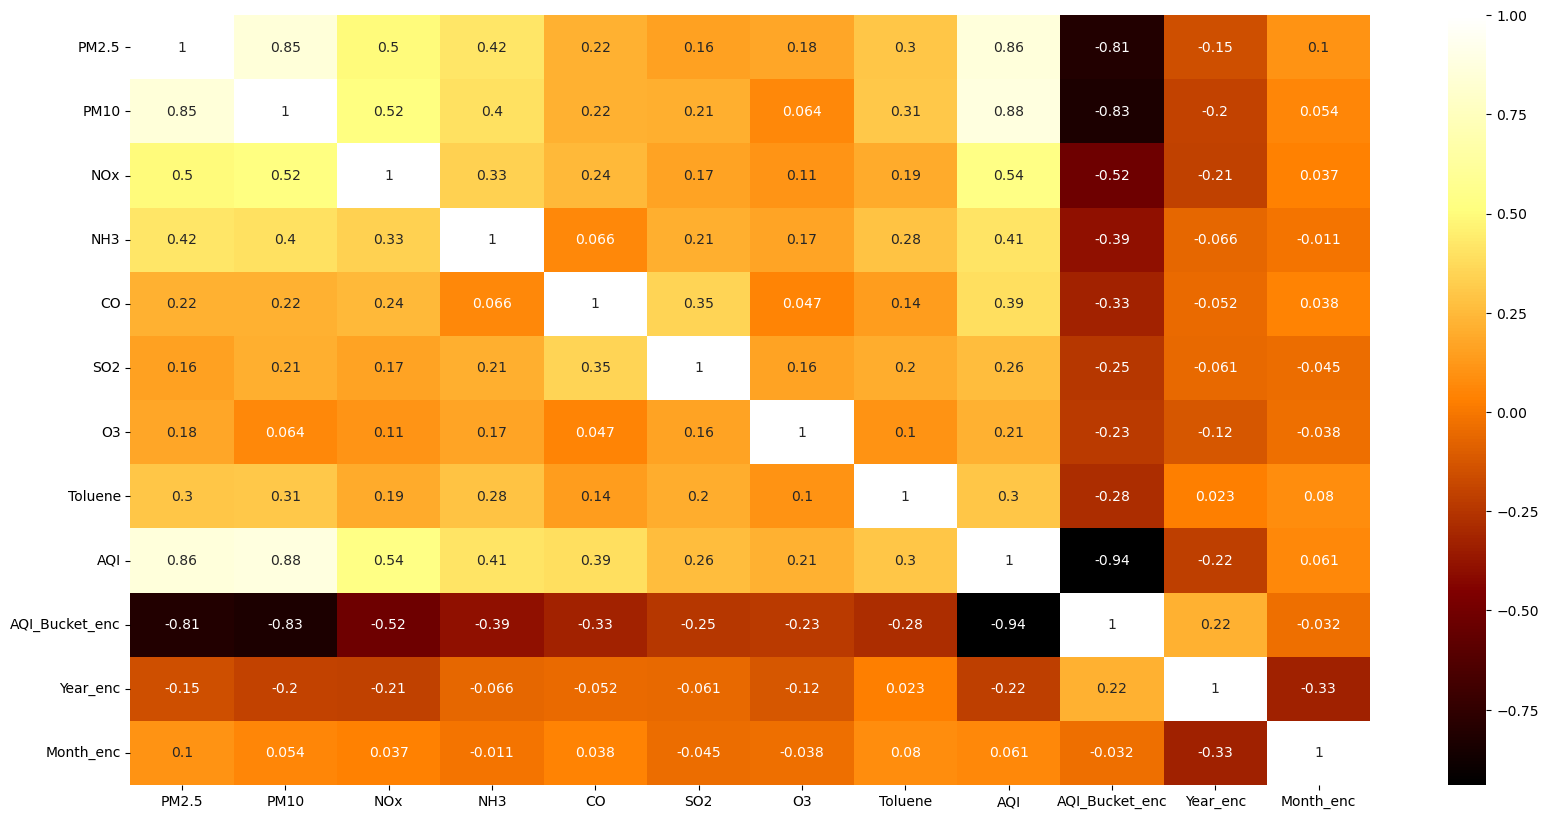

In [97]:
sns.heatmap(d.corr(),annot=True,cmap="afmhot")

# Assumptions 

### Checking the Linearity

In [98]:
# h0= the dat has linear relationship with the target

# h1= h0 is false

sma.stats.linear_rainbow(model) # higher the test stats lower the p value

# inference: since p value is less than 0.05
# we reject the h0~ that the data is not linear

(1.0335480453117238, 0.003830017051187755)

### Checking the Normality

In [101]:
import scipy.stats as stats

In [102]:
#h0: data/residual are normally distrubuted
#h1: data /residual are not normally distributed

#note: residual is error => y_i-y_hat
stats.jarque_bera(model.resid)

#remember that the jarque-bera test is based on kurtosis and skewness

Jarque_beraResult(statistic=2212928.64847894, pvalue=0.0)

### Heteroscedasticity

* variance at the first will  not be same at the last ,eg: income vs expense when income increase the expense increases then the variance is also increased.
* unequal variance
* it is guaged as the data which has the variance not equal at different points
* the shape of the data is either open funnel or closed funnel
* thus it gives a pattern of variance getting distorted at different levels.
* the heteroscedasticity is present in the data due to the presence of the outliers. one can try to remove heteroscedasticity by removing the outliers or applying the log transformation.
#### test=> BreuschPagan Test

ho: equal variance present in the model

h1: false

In [103]:
# breuschpagan test

import statsmodels.stats.api as ssa


# model.exog: it represents all the data points/ input variables

ssa.het_breuschpagan(model.resid, model.model.exog)

# if p value is < 0.05 we reject is Ho

(4321.305154100633, 0.0, 470.9821745723695, 0.0)

### Checking Autocorrelation of error

In [104]:
### Durbin-Watson

from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

1.9877371907004124

In [ ]:
# Create a ML Model and try to find the feature importance.
# That could be one of the ways to filter the features..
# 5 Fold Cross validation and this time include Stations.
# Also, try to include the KBins Data and see if that creates an impact
# Try the Regularization Model - Ridge with an alpha =1 and then tune it.
# gradient boosting regressor & Take the Best Model and do the Sequential Feature Selector on that model...